In [146]:
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

In [147]:
df = pd.read_csv('chp_CSV.csv')
df.tail()

,ID,Borough,Name,Overall_Pop,Race_White,Race_Black,Race_Asian,Race_Latino,Race_Other,Age0to17,...,lower_95CL.29,upper_95CL.29,NYC_comparison.3,Premature_Mort_Number,Premature_Mort_Rate,NYC_Comparison.32,Life_Expectancy,lower_95CL.30,upper_95CL.30,NYC_Comparison.33
54,413,Queens,Queens Village,193280,12,55,18,12,3,19,...,2.3,5.1,Similar,1485.0,113.1,Lower,85.2,85.0,85.4,Higher
55,414,Queens,Rockaway and Broad Channel,112669,33,39,3,22,2,25,...,2.2,5.8,Similar,817.0,110.1,Lower,84.9,84.7,85.2,Higher
56,501,Staten Island,St. George and Stapleton,189893,35,21,12,30,2,23,...,1.6,4.6,Similar,1003.0,141.2,Lower,83.5,83.2,83.8,Higher
57,502,Staten Island,South Beach and Willowbrook,142374,63,3,18,14,2,20,...,1.3,4.9,Similar,981.0,159.5,Similar,81.9,81.6,82.2,Higher
58,503,Staten Island,Tottenville and Great Kills,160506,81,1,7,10,1,21,...,3.2,11.4,Similar,507.0,84.8,Lower,84.9,84.6,85.2,Higher


<AxesSubplot:title={'center':'Race Proportions for White and Black Populations Across NYC Borough Neighborhoods'}, xlabel='Percent White', ylabel='Percent Black'>

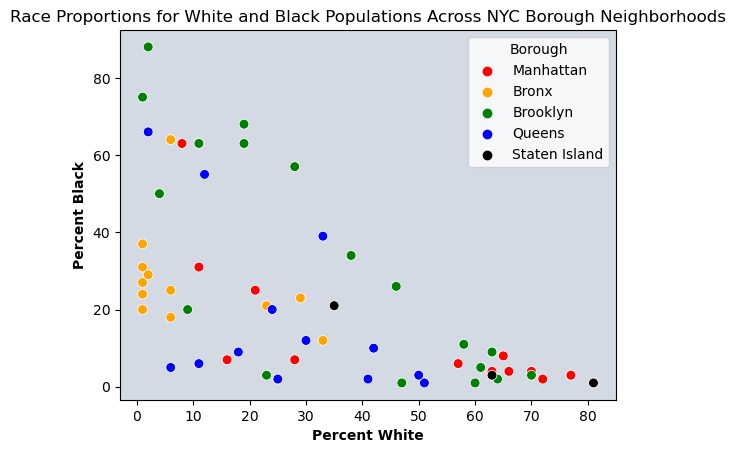

In [199]:
import warnings
warnings.filterwarnings("ignore")

df['Bor'] = 0

for x in range(0,len(df)):
    if df['Borough'][x] == 'Manhattan':
        df['Bor'][x] = 0
    elif df['Borough'][x] == 'Brooklyn':
        df['Bor'][x] = 1
    elif df['Borough'][x] == 'Bronx':
        df['Bor'][x] = 2
    elif df['Borough'][x] == 'Queens':
        df['Bor'][x] = 3
    elif df['Borough'][x] == 'Staten Island':
        df['Bor'][x] = 4

ax = plt.axes()
ax.set_facecolor("#d3dae3")

plt.xlabel('Percent White', fontweight='bold')
plt.ylabel('Percent Black', fontweight='bold')
plt.title('Race Proportions for White and Black Populations Across NYC Borough Neighborhoods')
sns.scatterplot(data=df, x = 'Race_White', y = 'Race_Black', hue = 'Borough', palette = ['red', 'orange', 'green', 'blue', 'black'], s=50)



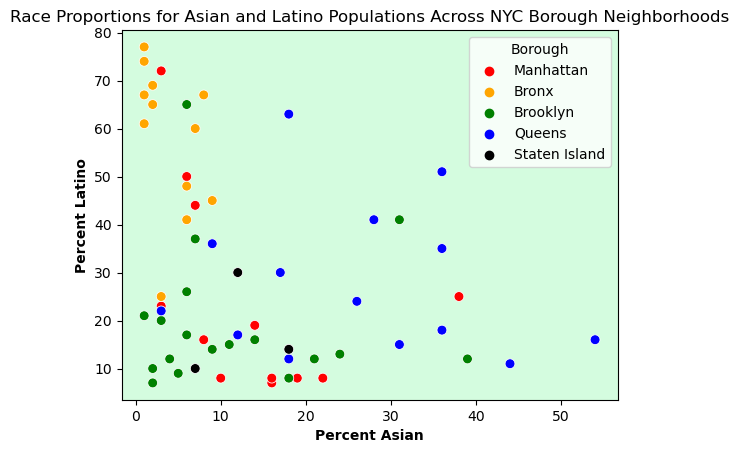

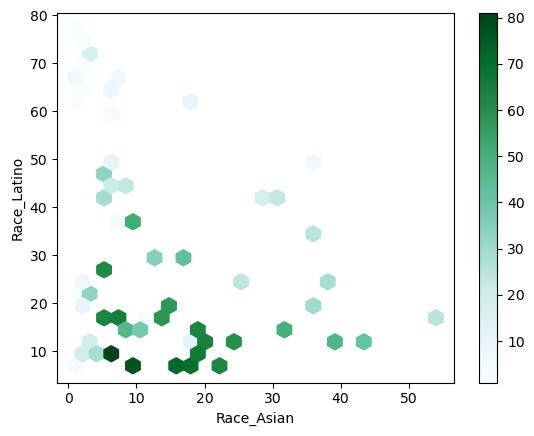

In [207]:
ax = plt.axes()
ax.set_facecolor("#d4fcdf")


plt.xlabel('Percent Asian', fontweight='bold')
plt.ylabel('Percent Latino', fontweight='bold')
plt.title('Race Proportions for Asian and Latino Populations Across NYC Borough Neighborhoods')
sns.scatterplot(data=df, x = 'Race_Asian', y = 'Race_Latino', hue = 'Borough', palette = ['red', 'orange', 'green', 'blue', 'black'], s=50)

df.plot.hexbin(x="Race_Asian", y="Race_Latino", C="Race_White", reduce_C_function=np.max, gridsize=25);

In [213]:
!pip install plotly

In [229]:
import plotly.express as px

#Making a new category of age ranges 0-24
df['Age0to24'] = 0
for x in range(0,len(df)):
    df['Age0to24'][x]=df['Age0to17'][x]+df['Age18to24'][x]

fig = px.scatter_3d(df, x='Age0to24', y='Age45to64', z='Age65plus',
              color='Borough', opacity=0.7, title="Proportions of Age Groups")
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

In [240]:
df2 = pd.read_csv('csv2.0.csv')
df2.head()

,ID,Borough,Name,Overall_Pop,Race_White,Race_Black,Race_Asian,Race_Latino,Race_Other,Age0to17,...,NYC_comparison.3,Premature_Mort_Number,Premature_Mort_Rate,NYC_Comparison.32,Life_Expectancy,lower_95CL.30,upper_95CL.30,NYC_Comparison.33,Unnamed: 196,Unnamed: 197
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,NYC,Manhattan,1576876.0,46.0,13.0,13.0,26.0,2.0,15.0,...,NaN,10221.0,136.5,NaN,84.1,84.1,84.2,NaN,NaN,NaN
2,2.0,NYC,Bronx,1424948.0,9.0,29.0,4.0,56.0,1.0,24.0,...,NaN,15319.0,234.8,NaN,80.1,80.0,80.2,NaN,NaN,NaN
3,3.0,NYC,Brooklyn,2641052.0,37.0,29.0,13.0,19.0,2.0,22.0,...,NaN,20851.0,179.2,NaN,82.1,82.0,82.1,NaN,NaN,NaN
4,4.0,NYC,Queens,2331143.0,25.0,18.0,27.0,28.0,3.0,20.0,...,NaN,14807.0,132.5,NaN,83.4,83.4,83.5,NaN,NaN,NaN


In [243]:
fig = px.pie(df2, values='Overall_Pop', names='Name', title='Population of European continent')
fig.show()

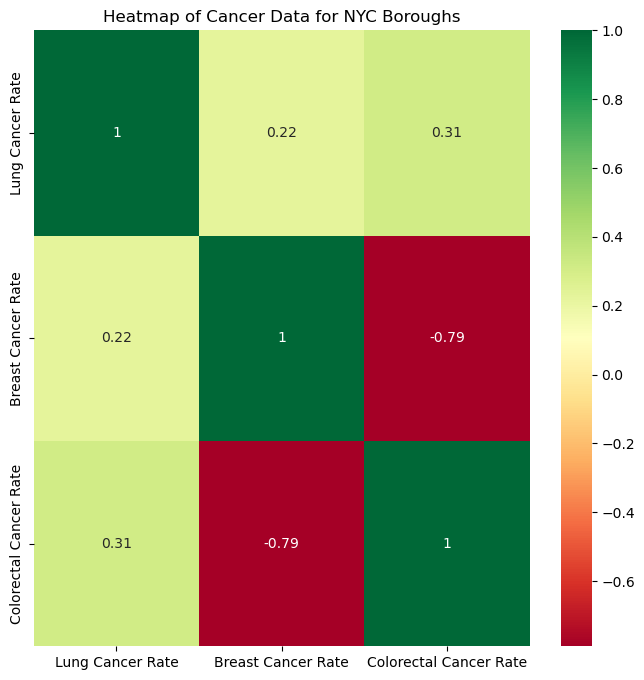

In [260]:
df3 = pd.read_csv('csv4.0.csv')
corr = df3.corr()
plt.subplots(figsize = (8, 8))

#Plot a heatmap of the correlation matrix we created
sns.heatmap(corr, annot = True, cmap = 'RdYlGn')
plt.title('Heatmap of Cancer Data for NYC Boroughs')
plt.show()